In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
#from celluloid import Camera
import matplotlib.cm as cm

def analytical_solution(nt, nx, delta_x, NU):
    # Calculated params
    omega = 0.2

    # Initialise data structures
    u_analytical = np.zeros((nx,nt))
    x = np.zeros(nx)
    t = np.zeros(nt)

    # Boundary conditions
    #u[0,:] = u[nx-1,:] = 0

    # Initial conditions
    for i in range(0,nx):
        #u[i,0] = 0#np.cos(omega*i*180/(nx*np.pi))
        if i < nx/4:
            u[i,0] = 2
        else:
            u[i,0] = 1
            
    # Distance
    for i in range(0,nx):
        x[i] = i*delta_x
        
    #Analytical Solution
    for n in range(0,nt):
        t = n * delta_t
        for i in range(0,nx):
            phi = exp( -(x[i]-4*t)**2/(4*NU*(t+1)) ) + exp( -(x[i]-4*t-2*PI)**2/(4*NU*(t+1)) )
            dphi = ( -0.5*(x[i]-4*t)/(NU*(t+1))*exp( -(x[i]-4*t)**2/(4*NU*(t+1)) )
               -0.5*(x[i]-4*t-2*PI)/(NU*(t+1))*exp( -(x[i]-4*t-2*PI)**2/(4*NU*(t+1)) ) )

            u_analytical[i,n] = -2*NU*(dphi/phi) + 4

        
    return u_analytical, x

def plot_convection(u_k,k):
    """
    Plots the 1D velocity field
    """
    plt.clf()
    plt.plot(x,u_k,'r')
    plt.xlabel('x (m)')
    plt.ylabel('u (m/s)')
    plt.ylim([np.amin(u)-0.1*abs(np.amax(u)),1.1*np.amax(u)])
    plt.title(f"Temperature at t = {k*delta_t:.3f} unit time")
    return plt

def plot_convection2(u,k,i,x):
    plt.plot(x,u[:,k],color=colorwave[i])
    plt.xlabel('x (m)')
    plt.ylabel('u (m/s)')
    plt.ylim([np.amin(u)-0.1,np.amax(u)+0.1])
    #plt.title(f"Temperature at t = {k*delta_t:.3f} unit time")
    
def animate(k):
    plot_convection(u[:,k], k)

## Inspired by
## http://thevisualroom.com/burgers_equation.html

Equation:

## $$
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} - v \frac{\partial^2 u}{\partial x^2} = 0
$$

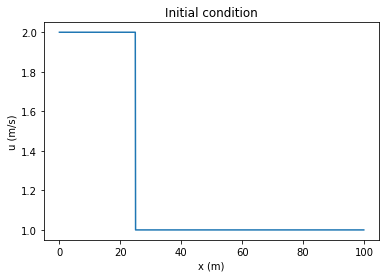

In [3]:
name = '4 Burgers Equation'
nx = 1000
nt = 1000
v = 1
alpha = 0.5
delta_x = 0.1
delta_t = (delta_x ** 2)/(4 * alpha)

u,x = convection(nt,nx,delta_x,v)
        
plt.plot(x,u[:,0])
plt.xlabel('x (m)')
plt.ylabel('u (m/s)')
plt.title('Initial condition')
plt.show()

In [4]:
def calculate(u):
    ipos = np.zeros(nx)
    ineg = np.zeros(nx)

    # Periodic boundary conditions
    for i in range(0,nx):
        x[i] = i*delta_x
        ipos[i] = i+1
        ineg[i] = i-1
    ipos[nx-1] = 0
    ineg[0] = nx-1
    
        
    omega = 0.01
    for k in range(0,nt-1):
        u[0,k+1] = 2#np.sin(omega*k*180/(nx*np.pi))
        u[-1,k+1] = 1
        for i in range(1,nx-1):
            u[i,k+1] = u[i,k] -u[i,k]*(delta_t/delta_x)*(u[i,k]-u[i-1,k]) +v*(delta_t/delta_x**2)*(u[i+1,k]-2*u[i,k]+u[i-1,k])
        #u[0,k+1] = u[1,k+1]
    return u

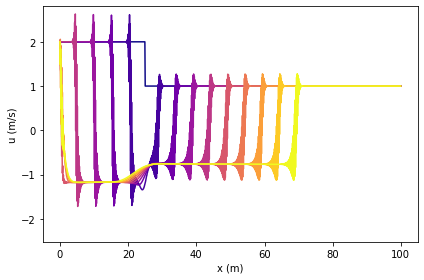

In [5]:
length = 10
u,x = convection(nt,nx,delta_x,v)
u = calculate(u)
karray = np.linspace(0,nt-1,length)
colorwave = cm.plasma(np.linspace(0, 1, length))
for i in range(length):
    k = int(karray[i])
    plot_convection2(u,k,i,x)
plt.tight_layout()
plt.savefig(str(name)+'.svg', format='svg')
plt.show()

Done!


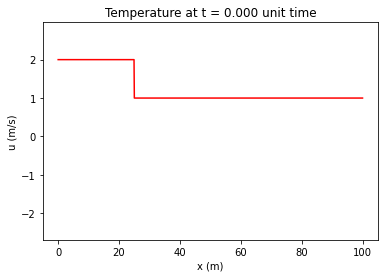

In [6]:
# Do the calculation here
#u = calculate(u)
   
anim = animation.FuncAnimation(plt.figure(), animate, interval=10, frames=nt, repeat=False)
#anim.save("heat_equation_solution.mp4", writer="PillowWriter", fps=2)
anim.save(str(name)+".mp4")

print("Done!")